<a href="https://colab.research.google.com/github/0Park/Deeplearning-NLP/blob/master/spam_classifier(simpleRNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
spam_data=pd.read_csv('/content/datasets_483_982_spam.csv',encoding='latin1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
del spam_data['Unnamed: 2']
del spam_data['Unnamed: 3']
del spam_data['Unnamed: 4']
spam_data['v1']=spam_data['v1'].replace(['ham','spam'],[0,1])

In [ ]:
spam_data.info()
# No Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
#check duplication
spam_data['v2'].nunique(), spam_data['v1'].nunique()

(5169, 2)

In [ ]:
# remove duplication
spam_data.drop_duplicates(subset=['v2'],inplace=True)

In [ ]:
print('총 샘플의 수:',len(spam_data))

총 샘플의 수: 5169


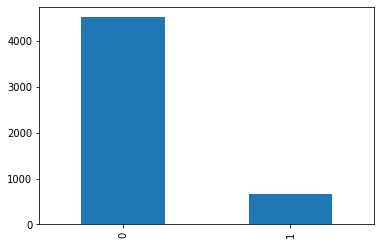

In [ ]:
# plot the label
spam_data['v1'].value_counts().plot(kind='bar')

In [ ]:
spam_data['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

In [ ]:
import re
processed=[]
for sentence in spam_data['v2']:
  sentence=re.sub('[^a-zA-Z]',' ',sentence) # remove except alphabet
  sentence=sentence.lower() # lower the alphabet
  processed.append(sentence)

In [ ]:
# delete stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words=set(nltk.corpus.stopwords.words('english')) 
pre_sentence=''
pre_text=[]
for sentence in processed:
  pre_sentence=' '.join([word for word in sentence.split() if word not in stop_words and len(word)>1])
  pre_text.append(pre_sentence)
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pre_text[:5]

['go jurong point crazy available bugis great world la buffet cine got amore wat',
 'ok lar joking wif oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate apply',
 'dun say early hor already say',
 'nah think goes usf lives around though']

In [ ]:
X_data=pre_text
y_data=spam_data['v1']
print(len(X_data))
print(len(y_data))

5169
5169


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences=tokenizer.texts_to_sequences(X_data)

In [ ]:
print(sequences[:5])

[[6, 3467, 616, 549, 510, 1000, 50, 295, 752, 2356, 1001, 11, 3468, 51], [7, 190, 1151, 307, 1515], [8, 387, 830, 753, 95, 2357, 1002, 550, 2358, 170, 158, 18, 2357, 243, 387, 456, 1003, 25, 308, 309], [123, 69, 231, 2359, 62, 69], [754, 36, 327, 700, 1516, 105, 310]]


In [ ]:
word_to_index=tokenizer.word_index
print(word_to_index)

{'call': 1, 'get': 2, 'ur': 3, 'gt': 4, 'lt': 5, 'go': 6, 'ok': 7, 'free': 8, 'know': 9, 'like': 10, 'got': 11, 'good': 12, 'come': 13, 'day': 14, 'time': 15, 'want': 16, 'love': 17, 'text': 18, 'send': 19, 'going': 20, 'one': 21, 'need': 22, 'lor': 23, 'home': 24, 'txt': 25, 'see': 26, 'still': 27, 'stop': 28, 'back': 29, 'today': 30, 'da': 31, 'dont': 32, 'reply': 33, 'take': 34, 'hi': 35, 'think': 36, 'tell': 37, 'sorry': 38, 'new': 39, 'mobile': 40, 'please': 41, 'well': 42, 'phone': 43, 'hey': 44, 'much': 45, 'oh': 46, 'hope': 47, 'night': 48, 'week': 49, 'great': 50, 'wat': 51, 'dear': 52, 'later': 53, 'msg': 54, 'pls': 55, 'give': 56, 'make': 57, 'way': 58, 'claim': 59, 'happy': 60, 'yes': 61, 'already': 62, 'number': 63, 'ask': 64, 'work': 65, 'yeah': 66, 'www': 67, 'really': 68, 'say': 69, 'im': 70, 'prize': 71, 'tomorrow': 72, 'right': 73, 'meet': 74, 'babe': 75, 'thanks': 76, 'cash': 77, 'find': 78, 'message': 79, 'said': 80, 'cos': 81, 'lol': 82, 'let': 83, 'would': 84, 'la

In [ ]:
len(word_to_index)

7546

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # total number of words
rare_cnt = 0 # count the number of rare words
total_freq = 0 # sum of total words frequency
rare_freq = 0 # sum of rare words frequency

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('frequency is lower than %s: %s'%(threshold - 1, rare_cnt))
print("in word set(vocabulary) ratio of rare words:", (rare_cnt / total_cnt)*100)
print("in tota frequency of word ratio of rare words frequency:", (rare_freq / total_freq)*100)

frequency is lower than 1: 4080
in word set(vocabulary) ratio of rare words: 54.068380598992846
in tota frequency of word ratio of rare words frequency: 9.446849892333695


In [ ]:
vocab_size=len(word_to_index)+1
n_of_train=int(len(sequences)*0.8)
n_of_test=int(len(sequences)-n_of_train)
print(n_of_train)
print(n_of_test)

4135
1034


In [ ]:
max_len=max(len(s) for s in sequences)
print(max_len)

75


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data=pad_sequences(sequences,maxlen=max_len)

In [ ]:
X_train=data[:n_of_train]
y_train=np.array(y_data[:n_of_train])
X_test=data[n_of_train:]
y_test=np.array(y_data[n_of_train:])


In [ ]:
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Embedding(vocab_size,32))
model.add(SimpleRNN(32)) # hidden_size=32
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(X_train,y_train,epochs=4,batch_size=64,validation_split=0.2)

Train on 3308 samples, validate on 827 samples
Epoch 1/4
3308/3308 [==============================] - 2s 496us/sample - loss: 0.3358 - acc: 0.8872 - val_loss: 0.1964 - val_acc: 0.9383
Epoch 2/4
3308/3308 [==============================] - 1s 273us/sample - loss: 0.1170 - acc: 0.9719 - val_loss: 0.0907 - val_acc: 0.9722
Epoch 3/4
3308/3308 [==============================] - 1s 312us/sample - loss: 0.0578 - acc: 0.9852 - val_loss: 0.0715 - val_acc: 0.9782
Epoch 4/4
3308/3308 [==============================] - 1s 279us/sample - loss: 0.0366 - acc: 0.9891 - val_loss: 0.0709 - val_acc: 0.9807


In [ ]:
print('\n 테스트 정확도: %.4f'%(model.evaluate(X_test,y_test)[1]))

1034/1034 [==============================] - 0s 142us/sample - loss: 0.0680 - acc: 0.9826

 테스트 정확도: 0.9826


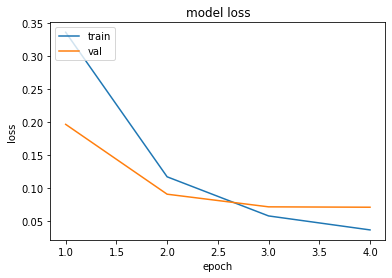

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()